In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import plotly.express as px
import re
import string
from wordcloud import WordCloud, STOPWORDS

# ***Topics in EDA***
#### 1. Basic Information about Data
#### 2. Understanding the data and removing unwanted
#### 3. Analysis on "Text"
        - Hashtag Analysis - Textual
        - Tweets Analysis - Timeline
#### 4. Analysis on "Location" field

#### ***Reading the scrapped data and assigning into dataframe called "tweets"***

In [2]:
tweets=pd.read_csv('/Users/nikhiljoshi/Downloads/tweetfinal (2).csv')

#### 1. Basic Information about Data

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619820 entries, 0 to 619819
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  619820 non-null  object
 1   Tweet Id  619820 non-null  int64 
 2   Text      619820 non-null  object
 3   Username  619820 non-null  object
 4   Location  464655 non-null  object
 5   Retweet   619820 non-null  int64 
 6   Like      619820 non-null  int64 
 7   Place     20430 non-null   object
 8   Lang      619820 non-null  object
 9   Hashtags  619637 non-null  object
dtypes: int64(3), object(7)
memory usage: 47.3+ MB


In [4]:
tweets.head()

,Datetime,Tweet Id,Text,Username,Location,Retweet,Like,Place,Lang,Hashtags
0,2022-05-28 21:21:47+00:00,1530660629899579393,"Già, il #chinesevirus !!!\nArticolo molto inte...",FlavioPozza,NaN,0,0,NaN,it,"['chinesevirus', 'maisinistra']"
1,2022-05-28 19:45:20+00:00,1530636359492423680,VACUNAS DEL #chinesevirus MATAN MÁS! https://t...,JotaMTG,Blumenau - SC - Brazil,3,1,NaN,es,['chinesevirus']
2,2022-05-28 14:07:28+00:00,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,_nishantkumar00,NaN,1,1,NaN,en,['Chinesevirus']
3,2022-05-28 13:57:55+00:00,1530548928294305792,#lmao #chinesevirus #monkeypox #wef #KlausSchw...,mechatrollnics,NaN,0,0,NaN,und,"['lmao', 'chinesevirus', 'monkeypox', 'wef', '..."
4,2022-05-28 10:07:40+00:00,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,Buntea,बस यहीं..,0,2,NaN,en,"['ChineseVirus', 'Bollywoodias']"


In [5]:
print ("Rows     : " ,tweets.shape[0])
print ("Columns  : " ,tweets.shape[1])
print ("\nUnique values :  \n",tweets.nunique())

Rows     :  619820
Columns  :  10

Unique values :  
 Datetime    601326
Tweet Id    607545
Text        591807
Username    193630
Location     49777
Retweet        548
Like          1059
Place         4986
Lang            63
Hashtags    332532
dtype: int64


In [6]:
tweets.isnull().sum()

Datetime         0
Tweet Id         0
Text             0
Username         0
Location    155165
Retweet          0
Like             0
Place       599390
Lang             0
Hashtags       183
dtype: int64

#### 2. Understanding the Data

In [7]:
# Getting the count of top 5 languages for tweets
language_count = tweets["Lang"].value_counts().nlargest(5)
print(language_count)

en     537387
und     46544
hi       5575
es       4266
fr       3071
Name: Lang, dtype: int64


#### 2.1) Dropping Columns

In [8]:
#dropping duplicate tweets on Tweet ID
df_result=tweets.drop_duplicates(["Tweet Id"],keep=False)

In [9]:
#Dropping duplicate tweet texts
df_result=tweets.drop_duplicates(["Text"],keep=False)


In [10]:
#Removing all languages except english
df_result.drop(df_result[df_result['Lang'] !='en'].index, inplace = True)
df_result.reset_index(drop=True)

/var/folders/57/tx7rlqy15q167jrtg5rd5p_40000gn/T/ipykernel_52552/2860842350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.drop(df_result[df_result['Lang'] !='en'].index, inplace = True)


,Datetime,Tweet Id,Text,Username,Location,Retweet,Like,Place,Lang,Hashtags
0,2022-05-28 14:07:28+00:00,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,_nishantkumar00,NaN,1,1,NaN,en,['Chinesevirus']
1,2022-05-28 10:07:40+00:00,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,Buntea,बस यहीं..,0,2,NaN,en,"['ChineseVirus', 'Bollywoodias']"
2,2022-05-28 04:16:27+00:00,1530402599618244610,@nytimes Once again the entitled NYT wants to ...,BioweaponCovid,NaN,0,0,NaN,en,['ChineseVirus']
3,2022-05-27 15:47:59+00:00,1530214238320467969,#NoWonder #China's #WhiteTerror or #BlueTerror...,TibetPeople,NaN,2,6,NaN,en,"['NoWonder', 'China', 'WhiteTerror', 'BlueTerr..."
4,2022-05-27 15:31:08+00:00,1530210001649811458,"Hey, what a surprise, 1 year later and nada! #...",TheBradRules1,New York,1,0,NaN,en,"['JustAFriendlyReminder', 'ChineseVirus', 'Cov..."
...,...,...,...,...,...,...,...,...,...,...
505101,2017-12-31 09:30:00+00:00,947399429383786496,Father returns from overseas wedding after son...,AsAmNews,San Francisco,0,1,NaN,en,['AAPI']
505102,2017-12-31 09:00:01+00:00,947391885525516288,Future unclear for White House Commission on #...,AsAmNews,San Francisco,0,1,NaN,en,"['Asian', 'AAPI']"
505103,2017-12-31 08:22:32+00:00,947382453009879040,Happy New year to my fav #Aapi on #Twitter @Ar...,imtarar7,"Lleida, España",1,0,NaN,en,"['Aapi', 'Twitter']"
505104,2017-12-31 06:30:00+00:00,947354130661519361,NY Times called out for misstep in Asian cultu...,AsAmNews,San Francisco,0,1,NaN,en,['AAPI']


In [11]:
#dropping user name and language 
df_result=df_result.drop(['Username','Lang'], axis=1)
df_result.reset_index(drop=True)

,Datetime,Tweet Id,Text,Location,Retweet,Like,Place,Hashtags
0,2022-05-28 14:07:28+00:00,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,NaN,1,1,NaN,['Chinesevirus']
1,2022-05-28 10:07:40+00:00,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,बस यहीं..,0,2,NaN,"['ChineseVirus', 'Bollywoodias']"
2,2022-05-28 04:16:27+00:00,1530402599618244610,@nytimes Once again the entitled NYT wants to ...,NaN,0,0,NaN,['ChineseVirus']
3,2022-05-27 15:47:59+00:00,1530214238320467969,#NoWonder #China's #WhiteTerror or #BlueTerror...,NaN,2,6,NaN,"['NoWonder', 'China', 'WhiteTerror', 'BlueTerr..."
4,2022-05-27 15:31:08+00:00,1530210001649811458,"Hey, what a surprise, 1 year later and nada! #...",New York,1,0,NaN,"['JustAFriendlyReminder', 'ChineseVirus', 'Cov..."
...,...,...,...,...,...,...,...,...
505101,2017-12-31 09:30:00+00:00,947399429383786496,Father returns from overseas wedding after son...,San Francisco,0,1,NaN,['AAPI']
505102,2017-12-31 09:00:01+00:00,947391885525516288,Future unclear for White House Commission on #...,San Francisco,0,1,NaN,"['Asian', 'AAPI']"
505103,2017-12-31 08:22:32+00:00,947382453009879040,Happy New year to my fav #Aapi on #Twitter @Ar...,"Lleida, España",1,0,NaN,"['Aapi', 'Twitter']"
505104,2017-12-31 06:30:00+00:00,947354130661519361,NY Times called out for misstep in Asian cultu...,San Francisco,0,1,NaN,['AAPI']


#### 2.2) Formatting Date/Time Columns for further analysis

In [12]:

df_result['Datetime'] = df_result['Datetime'].astype('datetime64')
df_result=df_result.reset_index(drop=True)

#### 3. Hashtag Analysis - Textual

3.1) Basic Textual Analysis and dropping unwanted column

In [13]:
# Removing unwnated data in Tweets columns and converting every text to lower case
df_result['new_Hashtags'] = [re.sub(r'[^\w\s]','', str(df_result['Hashtags'][i])) for i in range (0, len(df_result))]


In [14]:
df_result['new_Hashtags']=[df_result['new_Hashtags'][i].lower() for i in range (0, len(df_result))]
df_result['new_Hashtags']
df_result=df_result.drop(['Hashtags'], axis=1)
df_result

,Datetime,Tweet Id,Text,Location,Retweet,Like,Place,new_Hashtags
0,2022-05-28 14:07:28,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,NaN,1,1,NaN,chinesevirus
1,2022-05-28 10:07:40,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,बस यहीं..,0,2,NaN,chinesevirus bollywoodias
2,2022-05-28 04:16:27,1530402599618244610,@nytimes Once again the entitled NYT wants to ...,NaN,0,0,NaN,chinesevirus
3,2022-05-27 15:47:59,1530214238320467969,#NoWonder #China's #WhiteTerror or #BlueTerror...,NaN,2,6,NaN,nowonder china whiteterror blueterror ccp free...
4,2022-05-27 15:31:08,1530210001649811458,"Hey, what a surprise, 1 year later and nada! #...",New York,1,0,NaN,justafriendlyreminder chinesevirus coverup
...,...,...,...,...,...,...,...,...
505101,2017-12-31 09:30:00,947399429383786496,Father returns from overseas wedding after son...,San Francisco,0,1,NaN,aapi
505102,2017-12-31 09:00:01,947391885525516288,Future unclear for White House Commission on #...,San Francisco,0,1,NaN,asian aapi
505103,2017-12-31 08:22:32,947382453009879040,Happy New year to my fav #Aapi on #Twitter @Ar...,"Lleida, España",1,0,NaN,aapi twitter
505104,2017-12-31 06:30:00,947354130661519361,NY Times called out for misstep in Asian cultu...,San Francisco,0,1,NaN,aapi


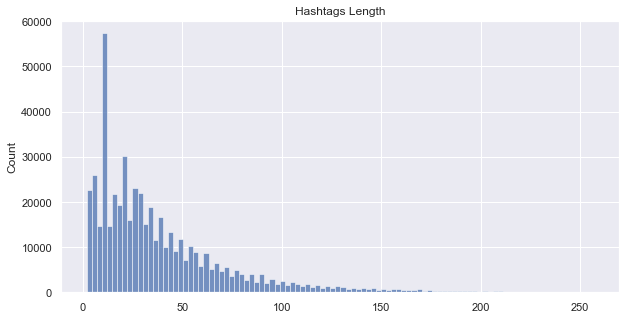

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df_result.new_Hashtags], bins=100)
plt.title('Hashtags Length')
plt.show()

### Top 5 Hashtags

In [20]:
hashtags=df_result.new_Hashtags.value_counts().iloc[:5].index
hashtags=hashtags.tolist()

### Plot of Top 5 Hashtags

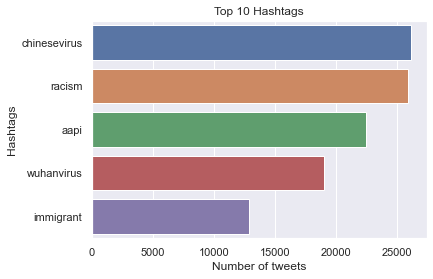

In [21]:
ax = sns.countplot(y="new_Hashtags", data=df_result,order=hashtags)

ax.set_xlabel('Number of tweets')
ax.set_ylabel('Hashtags')
ax.set_title('Top 10 Hashtags')
plt.show()

#### 3.2) Tweets Analysis - Timeline

## Yearly Tweets

In [22]:
df_result_y = df_result.set_index('Datetime')['Tweet Id'].resample('Y').nunique()

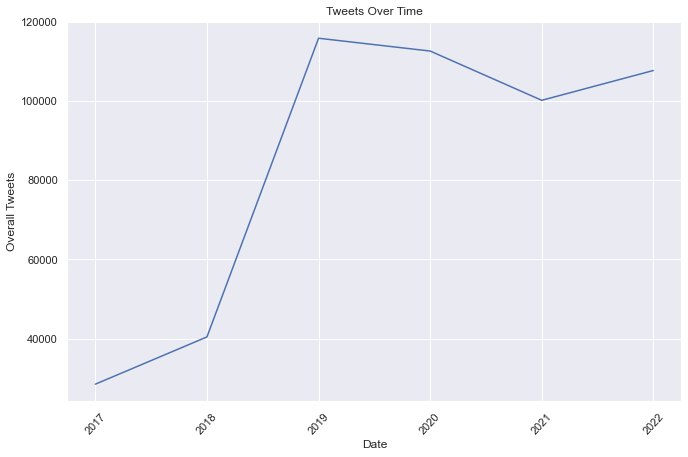

In [23]:
ax = pd.DataFrame(df_result_y.values).plot(
    grid=True,
    figsize=(11,7),
    legend=False
)
ax.set_xlabel('Date')
ax.set_title('Tweets Over Time')
ax.set_ylabel('Overall Tweets')
plt.xticks(
    range(len(df_result_y.index)), 
    [x.strftime('%Y') for x in df_result_y.index], 
    rotation=47
)

plt.show()

## Tweets for Top 5 hashtags yearly

In [25]:
common_hashtags=df_result['new_Hashtags'].value_counts()[:10].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='10 Most Common Hashtags')
fig.show()

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
temp=df_result[df_result['new_Hashtags'].isin(hashtags)]
temp['year']=temp['Datetime'].dt.year
temp3=pd.DataFrame(temp.groupby(['new_Hashtags','year']).size()).reset_index()
temp3.columns=['Hashtags','Year','Count']
temp3

/var/folders/57/tx7rlqy15q167jrtg5rd5p_40000gn/T/ipykernel_52552/2698384573.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hashtags,Year,Count
0,aapi,2017,8
1,aapi,2018,3783
2,aapi,2019,2962
3,aapi,2020,2533
4,aapi,2021,10187
5,aapi,2022,3023
6,chinesevirus,2020,15676
7,chinesevirus,2021,9824
8,chinesevirus,2022,667
9,immigrant,2017,4653


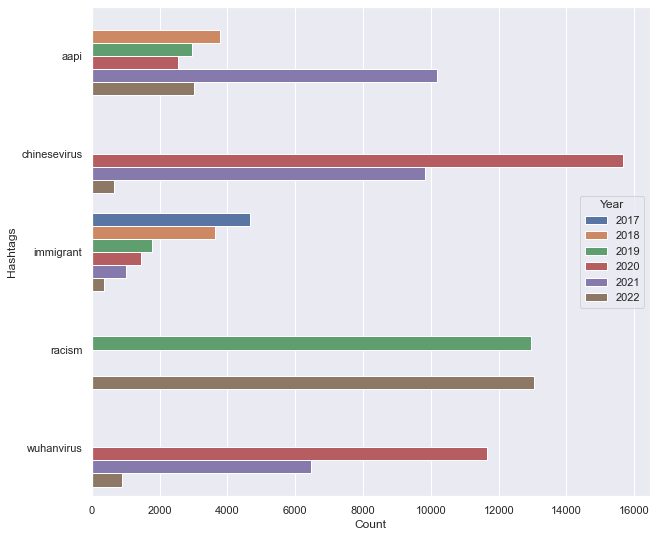

In [31]:
#Plotting the above table using Barpolot
plt.figure(figsize=(10, 9))
sns.set(font_scale = 1)
sns.barplot(y=temp3['Hashtags'],x=temp3['Count'],hue=temp3['Year'])
# Show graphic

plt.show()

## Month-Year Tweets

In [134]:
df_result_m = df_result.set_index('Datetime')['Tweet Id'].resample('M').nunique()

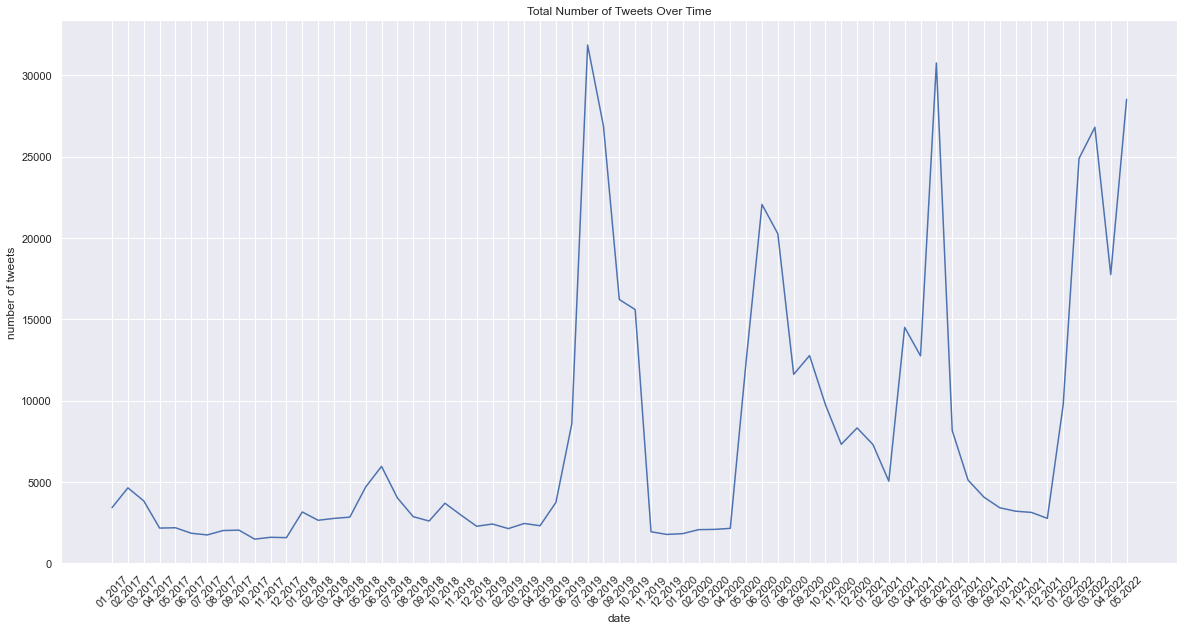

In [135]:
ax = pd.DataFrame(df_result_m.values).plot(
    grid=True,
    figsize=(20,10),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of tweets')
ax.set_title('Total Number of Tweets Over Time')

plt.xticks(
    range(len(df_result_m.index)), 
    [x.strftime('%m.%Y') for x in df_result_m.index], 
    rotation=45
)

plt.show()

## Tweet length

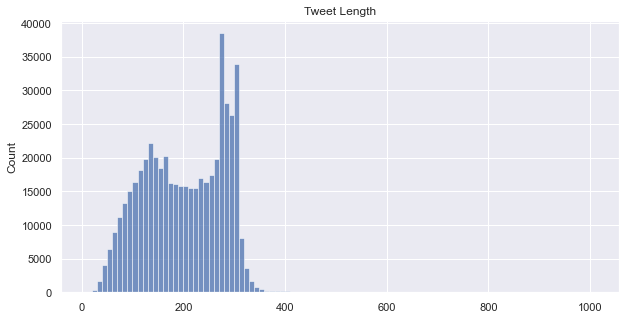

In [136]:

#plot hist of tweet length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df_result.Text], bins=100)
plt.title('Tweet Length')
plt.show()

## Tweets by hour of the day

<AxesSubplot:title={'center':'Tweets by hour of the day'}, xlabel='Datetime', ylabel='number of tweets'>

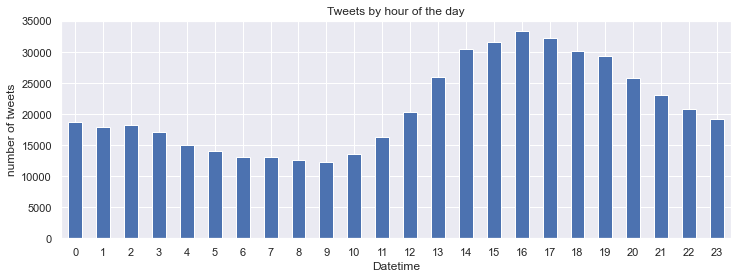

In [137]:
fig, axs = plt.subplots(figsize=(12, 4))

axs.set_xlabel('Hour')
axs.set_ylabel('number of tweets')
axs.set_title('Tweets by hour of the day')

df_result.groupby(df_result["Datetime"].dt.hour)["Tweet Id"].count().plot(kind='bar', rot=0, ax=axs)


#### 4. Analysis on "Location" field

In [138]:
df_result.Location.isna().sum()

119842

In [139]:
temp=df_result['Location'].value_counts()
temp.head()

United States     12884
Washington, DC     9098
San Francisco      8784
India              8730
New York, NY       6902
Name: Location, dtype: int64

In [140]:
#Filtering all User defined locations where tweets were more then 500
tempx=temp[temp > 500]
#Putting all this data in a dataframe tempx2
#tempx2=pd.DataFrame(tempx)
#tempx2.to_csv('LocationFiletemp.csv')
#Reading the above created dataframe after making all the changes
#tempx3=pd.read_csv('C:\\Users\\W0780808\\Desktop\\LocationFilex.csv')
tempx3=pd.read_csv('/Users/nikhiljoshi/Capstone Project/EDA Files/LocationFilex.csv')
tempx3.head()


,Location,Count,Country,City
0,United States,12885,United States,No Info
1,"Washington, DC",9114,United States,Washington
2,San Francisco,8804,United States,San Francisco
3,India,8730,India,No Info
4,"New York, NY",6914,United States,New York


Text(0, 0.5, 'Count of Tweets')

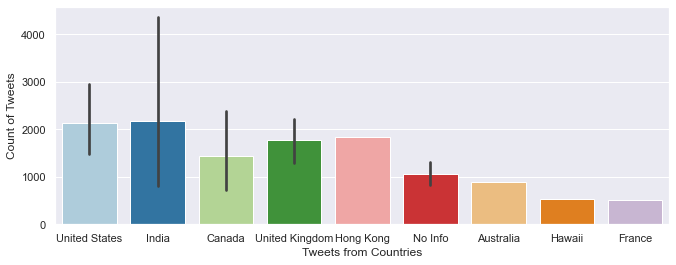

In [152]:
#Plotting the above Location information
plt.figure(figsize=(11,4))
ax=sns.barplot(x='Country',y="Count", data=tempx3,palette='Paired')
ax.set_xlabel('Tweets from Countries')
ax.set_ylabel('Count of Tweets')

##### From the above plot, we observe that United States is the primary location of our tweets



Text(0, 0.5, 'Total Tweets')

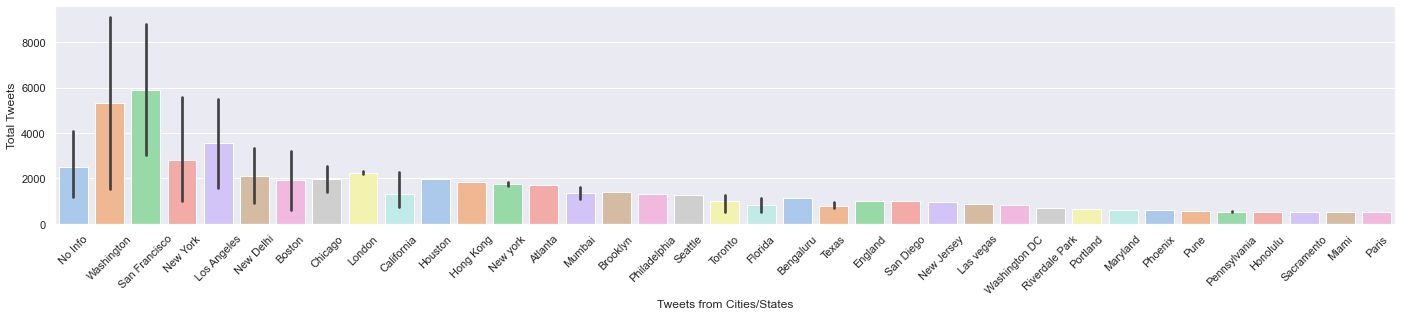

In [142]:
plt.figure(figsize=(24,4))
ax=sns.barplot(x='City',y='Count', data=tempx3,palette='pastel')
plt.xticks(rotation=45)
ax.set_xlabel('Tweets from Cities/States')
ax.set_ylabel('Total Tweets')

#### Analyzing "Place" Column

In [143]:
df_result.Place.isna().sum()

488057

In [144]:
temp2=df_result['Place'].value_counts()

In [145]:
print( temp2[temp2 > 100])

Coordinates(longitude=-118.668404, latitude=33.704538)     437
Coordinates(longitude=-77.119401, latitude=38.801826)      418
Coordinates(longitude=-74.026675, latitude=40.683935)      414
Coordinates(longitude=72.74484, latitude=18.845343)        232
Coordinates(longitude=-122.514926, latitude=37.708075)     216
Coordinates(longitude=76.84252, latitude=28.397657)        214
Coordinates(longitude=-95.823268, latitude=29.522325)      207
Coordinates(longitude=-79.639319, latitude=43.403221)      188
Coordinates(longitude=-74.041878, latitude=40.570842)      180
Coordinates(longitude=-73.962582, latitude=40.541722)      173
Coordinates(longitude=-75.280284, latitude=39.871811)      165
Coordinates(longitude=-71.191421, latitude=42.227797)      151
Coordinates(longitude=-87.940033, latitude=41.644102)      151
Coordinates(longitude=-122.436232, latitude=47.4953154)    147
Coordinates(longitude=72.946773, latitude=18.807586)       130
Coordinates(longitude=-78.030531, latitude=44.148007)  